Starting script for suspended line pipe calculator!
Starting calculation with following parameters:
H = 1380.929
L = 947.09
alpha = 6.5
line_weight = 44.517
bending_stiffness = 1760820.0
Runing iteration number 1000...
y_bottom is = -36.627297
T_0 is = 700.0kN
Bottom tension at node 63 x=410.0m, Arc length=1489.93m is 102.96 kN
y_bottom is = 672.836234
T_0 is = 350.5kN
Bottom tension at node 99 x=1775.3m, Arc length=1489.93m is 91.01 kN
Runing iteration number 2000...
y_bottom is = 318.154594
T_0 is = 525.25kN
Bottom tension at node 99 x=1507.7m, Arc length=1746.01m is 62.25 kN
Runing iteration number 3000...
y_bottom is = 140.662953
T_0 is = 612.62kN
Bottom tension at node 99 x=1373.9m, Arc length=1885.7m is 83.47 kN
Runing iteration number 4000...
y_bottom is = 52.210369
T_0 is = 656.31kN
Bottom tension at node 99 x=1307.0m, Arc length=1955.54m is 87.68 kN
Runing iteration number 5000...
y_bottom is = 7.845921
T_0 is = 678.16kN
Bottom tension at node 99 x=1273.6m, Arc length=1978.82m

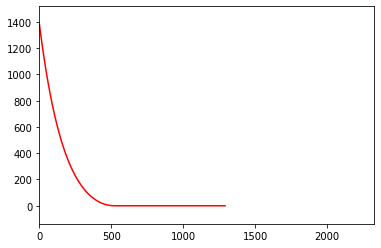

In [97]:
# Python script to calculate pipe line length
# Version: 1.0
# Author: Andres Belles Meseguer
# Date: 27 February 2020

#####################################################################
# Prerequisites:
#####################################################################
# - Python installed
# - Matplotlib library installed for plots
#   (python -m pip install -U pip
#    python -m pip install -U matplotlib

import math
import matplotlib
import matplotlib.pyplot as plt

print('Starting script for suspended line pipe calculator!')

#####################################################################
# Instructions:
#####################################################################
# - Define parameters
# - Run script


#####################################################################
# Parameters
#####################################################################
H = 1380.929  # m
L = 947.090  # m
alpha = 6.5  # deg
bending_stiffness = 1760.82e3  # Nm2
line_weight = 44.517  # kg/m
T_0 = 700.0e3  # N to start iterating

#####################################################################
# Calculation
#####################################################################
print('Starting calculation with following parameters:')
print('H = ' + str(H))
print('L = ' + str(L))
print('alpha = ' + str(alpha))
print('line_weight = ' + str(line_weight))
print('bending_stiffness = ' + str(bending_stiffness))

# An iterative process is necessary:
# L is divided in L_air and L_contact

segments = 100
boundary = 3

s = (H + L) / segments

x = [0] * (segments + 1)
y = [0] * (segments + 1)
w = [line_weight * 9.81] * (segments)
theta = [0] * (segments + boundary * 2)
T = [T_0] * (segments)

theta = [0] * (segments + boundary * 2)
T = [T_0] * (segments)

# Boundary conditions
x[0] = 0.0
x[segments] = L
y[0] = H
y[segments] = 0.0

for i in range(0, boundary):
    theta[i] = math.radians(90.0 - alpha)

# Initialization

for i in range(1, segments + 1):
    x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
    y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])
    x[i] = round(x[i], 6)
    y[i] = round(y[i], 6)


def Initialization():
    theta = [0] * (segments + boundary * 2)
    T = [T_0] * (segments)

    # Boundary conditions
    x[0] = 0.0
    x[segments] = L
    y[0] = H
    y[segments] = 0.0

    for i in range(0, boundary):
        theta[i] = math.radians(90.0 - alpha)

    # Initialization

    for i in range(1, segments + 1):
        x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
        y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])
        x[i] = round(x[i], 6)
        y[i] = round(y[i], 6)


# Initialization()

contact_point = 0.0
total_length_at_L = 0.0
old_total_length = 0.0


def ShowPlot(print_results=1):
    if (print_results == 1):
#         print('x = ' + str(x))
#         print('y = ' + str(y))
#         print('s = ' + str(s))
#         print('theta = ' + str(theta))
#         print('w = ' + str(w))
#         print('T = ' + str(T))
        print('total_length_at_L = ' + str(total_length_at_L))
        print('contact_point = ' + str(contact_point))

    axes = plt.gca()
    axes.set_xlim([0.0, L + H])
    axes.set_ylim([-H * 0.1, H * 1.1])
#     plt.figure(figsize=(20,20))
    plt.plot(x, y, 'r-')
    plt.show()


# ShowPlot()

# Calculation
y_bottom = -999.9
iteration = 1
T_tested_max = 1000000.0
T_tested_min = 1000.0
while ((y_bottom > -0.001) or (y_bottom < -1.0)):
    difference = 1.0
    old_total_length = 0.0
    while ((difference > 1e-9)):
        # for iterating in range(10):
        if (iteration % 1000 == 0):
            print('Runing iteration number ' + str(iteration) + '...')

        update_factor = 0.1

        # Finite differences iteration for theta
        new_theta = theta.copy()
        for i in range(boundary, segments + boundary):
            # dtheta_3 = (+theta[i+2]-2*theta[i+1]+2*theta[i-1]-theta[i-2])/(2*(s**3)) #Central finite differences
            dtheta_3 = (-theta[i + 3] + 8 * theta[i + 2] - 13 * theta[i + 1] + 13 * theta[i - 1] - 8 * theta[i - 2] +
                        theta[i - 3]) / (8 * (s ** 3))  # Central finite differences
            # dtheta_3 = (-1*theta[i]+3*theta[i-1]-3*theta[i-2]+1*theta[i-3])/(1*(s**3)) #Backward finite differences
            # print(dtheta_3)
            # new_theta_i = (bending_stiffness*dtheta_3 + w[i-boundary]/(math.tan(math.radians(theta[i])) + 1.0e-9))/(T[i-boundary]) + theta[i-1]
            # new_theta_i = (bending_stiffness*dtheta_3 + w[i-boundary] * (math.cos(math.radians(theta[i])))) * s[i-boundary] / (T[i-boundary]) + theta[i-1]
            new_theta_i = s * (bending_stiffness * dtheta_3 - w[i - boundary] * (math.cos(theta[i]))) / (
            T[i - boundary]) + theta[i - 1]

            # print((new_theta_i))

            # if((theta[i]-new_theta_i)>0.1):
            #    new_theta_i = theta[i] - 0.1
            # if((theta[i]-new_theta_i)<0.1):
            #    new_theta_i = theta[i] + 0.1

            new_theta[i] = theta[i] * (1 - update_factor) + new_theta_i * update_factor
            new_theta[i] = round(new_theta[i], 9)

            if (new_theta[i] > math.pi / 2):
                new_theta[i] = math.pi / 2

            if (new_theta[i] < 0.0):
                new_theta[i] = 0.0

            # print(theta)
            # print(new_theta)

        theta = new_theta.copy()

        update_factor = 0.1

        # Finite differences iteration for T
        new_T = T.copy()
        for i in range(1, segments):
            # for i in range(0, segments-1):
            # new_T_i = ((line_weight*s*math.sin(theta[boundary+i])) + T[i+1])
            new_T_i = -w[i] * math.sin(theta[boundary + i]) * s + T[i - 1]
            # print(new_T_i)
            new_T[i] = T[i] * (1 - update_factor) + new_T_i * update_factor

            new_T[i] = round(new_T[i], 3)
            # print(T)
            # print(new_T)

        T = new_T.copy()

        for i in range(1, segments + 1):
            x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
            y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])

            # if (y[i]<0.0):
            #    y[i] = 0.0
            #    theta[boundary+i-1] = math.asin((y[i-1]-y[i])/s)
            #    x[i] = x[i-1] + s*math.cos(theta[boundary+i-1])

            x[i] = round(x[i], 6)
            y[i] = round(y[i], 6)

        for i in range(1, segments):
            # if y[i] > 0.0:
            w[i] = line_weight * 9.81
            w[i] = round(w[i], 6)
        # else:
        #    w[i] = 0.0


        contact_point = 0.0
        for i in range(0, segments):
            if y[i] > 0.1:
                contact_point = x[i]
                contact_node = i

                
        total_length_at_L = 0.0
        tdpArcLength = 0
        for i in range(0, segments):
            if x[i] < L:
                total_length_at_L = total_length_at_L + s
                if x[i]<=contact_point:
                    tdpArcLength=tdpArcLength+s
            else:
                if x[i - 1] < L:
                    portion = L - x[i - 1]
                    total_length_at_L = total_length_at_L + portion

        difference = abs(old_total_length - total_length_at_L) / total_length_at_L
        old_total_length = total_length_at_L
        # if (iteration%10000==0):
        #    ShowPlot()

        iteration = iteration + 1

    y_bottom = y[segments]
    
    
    print("y_bottom is = " + str(y_bottom))
    print("T_0 is = " + str(round(T_0/1000,2)) + "kN")
    print(f"Bottom tension at node {contact_node} x={round(contact_point,1)}m, Arc length={round(tdpArcLength,2)}m is {round(T[contact_node]/1000,2)} kN")

    # ShowPlot(0)

    if (y_bottom > 1.0):
        if (T_tested_min < T_0):
            T_tested_min = T_0

        T_0 = (T_tested_max + T_tested_min) / 2
        T[0] = T_0

        difference = 999.9

    if (y_bottom < -1.0):
        if (T_tested_max > T_0):
            T_tested_max = T_0

        T_0 = (T_tested_max + T_tested_min) / 2
        T[0] = T_0

        difference = 999.9

ShowPlot()

#####################################################################
# Output
#####################################################################


# print('...')

In [103]:
y=np.array(y)
z=y-y[0]
z

array([    0.      ,   -23.126011,   -46.247264,   -69.363539,
         -92.474599,  -115.580192,  -138.680049,  -161.773885,
        -184.861394,  -207.94225 ,  -231.016105,  -254.082584,
        -277.141287,  -300.191783,  -323.233611,  -346.266273,
        -369.289234,  -392.301915,  -415.303691,  -438.293887,
        -461.271769,  -484.236543,  -507.187343,  -530.123227,
        -553.043167,  -575.94604 ,  -598.830615,  -621.69554 ,
        -644.53933 ,  -667.360347,  -690.156782,  -712.92663 ,
        -735.667667,  -758.377415,  -781.05311 ,  -803.691657,
        -826.289581,  -848.842967,  -871.34739 ,  -893.797834,
        -916.188586,  -938.513121,  -960.763952,  -982.932452,
       -1005.008639, -1026.980906, -1048.835694, -1070.557082,
       -1092.126277, -1113.520977, -1134.714572, -1155.675131,
       -1176.364134, -1196.734865, -1216.7304  , -1236.281104,
       -1255.301568, -1273.686974, -1291.308994, -1308.011578,
       -1323.607442, -1337.876658, -1350.569709, -1361.

In [ ]:
import pandas as pd
from rdp import rdp
df2=pd.DataFrame(x)
df2.columns=["x"]
df2["y"]=y
df2.iloc[0,1]
df2["y"]=df2["y"]-df2.iloc[0,1]
df2
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
points = rdp(df2, epsilon=0.6)
df3=pd.DataFrame(points)
df3.columns=["x",'y']
df3.iloc[-1]=[L,-H]
ax1.scatter(df.length, df.height, s=10, c='b', marker="s", label='orcaflex')
ax1.scatter(df3.x,df3.y, s=10, c='r', marker="o", label='andres')
plt.legend(loc='upper right');
plt.show()

In [ ]:
df2

In [58]:

df=pd.read_excel("testCaseResults.xls", sheet_name="Sheet1")
df
from math import cos,sin,tan,atan,degrees,radians
import numpy as np
g=np.array([[344.729,2.891,17.845],
[451.9433,943.8932,-1363.0841]])
a=atan((g[1][1]-g[0][1])/(g[1][0]-g[0][0]))
print(f"Azimuth is {degrees(a)} deg")
t_m = np.array([[cos(a), sin(a),0],[-sin(a), cos(a), 0],[0,0,1]])
print(f"Transformation matrix with given azimuth is \n{t_m}")
l=[]
for vect in g:
  l.append(t_m.dot(vect))
print(f"Local vectors in coordinate system rotated around Z axis for azimuth angle are\n {l}")
print(f"Note that now Y of {l[0][1]} is constant and could be ignored in the analysis \n \
    but needs to be taken into account when transforming back to global")
l_v=[]
for index, node in df.iterrows():
    globalVector = [node["X (m)"],node["Y (m)"],node["Z (m)"]]
    localVector = t_m.dot(globalVector)
    l_v.append(localVector)
n_v = l_v-l_v[0]
l= [p[0] for p in n_v]
h= [p[2] for p in n_v]
df["length"]=l
df["height"]=h
df

Azimuth is 83.49996141503874 deg
Transformation matrix with given azimuth is 
[[ 0.11320388  0.99357178  0.        ]
 [-0.99357178  0.11320388  0.        ]
 [ 0.          0.          1.        ]]
Local vectors in coordinate system rotated around Z axis for azimuth angle are
 [array([  41.89707735, -342.18573353,   17.845     ]), array([  988.98738273,  -342.18573353, -1363.0841    ])]
Note that now Y of -342.18573352966666 is constant and could be ignored in the analysis 
     but needs to be taken into account when transforming back to global


,Node,Arc Length (m),X (m),Y (m),Z (m),Azimuth (deg),Declination (deg),Gamma (deg),length,height
0,A,0.0,344.729000,2.891000,17.845000,84.022138,173.651827,0.518860,0.000000,0.000000
1,2,5.0,344.786644,3.441496,12.869765,83.937226,173.592675,0.434473,0.553482,-4.975235
2,3,10.0,344.847004,4.002021,7.895791,83.768279,173.471612,0.266602,1.117238,-9.949209
3,4,15.0,344.910203,4.573035,2.923152,83.599458,173.345817,0.098897,1.691736,-14.921848
4,5,20.0,344.976327,5.154867,-2.048086,83.507806,173.261238,0.007869,2.277313,-19.893086
...,...,...,...,...,...,...,...,...,...,...
396,397 *,1980.0,449.679135,924.020811,-1363.160787,83.499955,89.827108,-0.000595,927.089348,-1381.005787
397,398 *,1985.0,450.245183,928.988924,-1363.145704,83.499955,89.827414,-0.000595,932.089604,-1380.990704
398,399 *,1990.0,450.811232,933.957036,-1363.130663,83.499955,89.821691,-0.000595,937.089859,-1380.975663
399,400 *,1995.0,451.377281,938.925144,-1363.114582,83.499955,89.733290,-0.000595,942.090110,-1380.959582


Starting script for suspended line pipe calculator!
Starting calculation with following parameters:
H = 1380.9
L = 947.1
alpha = 6.5
line_weight = 47.803
bending_stiffness = 1760820.0
Runing iteration number 1000...
y_bottom is = 71.614936
T_0 is = 694.51kN
Bottom tension at node 99 x=1321.6m, Arc length=1932.24m is 352.38 kN
Runing iteration number 2000...
71.614936 -217.274827 1043 2230
Rate of convergance is: -7.030915752852235
y_bottom is = -217.274827
T_0 is = 847.26kN
Bottom tension at node 61 x=311.3m, Arc length=1443.36m is 202.32 kN
Runing iteration number 3000...
-217.274827 -72.824985 2230 3326
Rate of convergance is: 7.551429103952169
y_bottom is = -72.824985
T_0 is = 770.88kN
Bottom tension at node 62 x=373.3m, Arc length=1466.64m is 129.48 kN
Runing iteration number 4000...
-72.824985 -0.899864 3326 4359
Rate of convergance is: 3.9893570902882547
y_bottom is = -0.899864
T_0 is = 732.7kN
Bottom tension at node 66 x=498.9m, Arc length=1559.76m is 95.55 kN
...
total_length_a

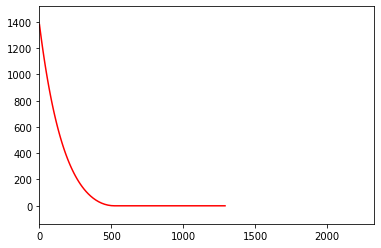

In [5]:
# Python script to calculate pipe line length
# Version: 1.0
# Author: Andres Belles Meseguer
# Date: 27 February 2020
# rev1 - added dumping and break
# rev2 - added global coordinate points - numpy is needed

#####################################################################
# Prerequisites:
#####################################################################
# - Python installed
# - Matplotlib library installed for plots
#   (python -m pip install -U pip
#    python -m pip install -U matplotlib

import math
import matplotlib
import matplotlib.pyplot as plt
import time
import numpy as np

print('Starting script for suspended line pipe calculator!')
#####################################################################
# Instructions:
#####################################################################
# - Define parameters
# - Run script


#####################################################################
# Parameters
#####################################################################

firstPoint = {"x":344.729,"y":2.891,"z":17.845}
lastPoint = {"x":451.9433,"y":943.8932,"z":-1363.0841}
global_points=np.array([[firstPoint["x"],firstPoint["y"],firstPoint["z"]],\
[lastPoint["x"],lastPoint["y"],lastPoint["z"]]])
azimuth=math.atan((global_points[1][1]-global_points[0][1])/(global_points[1][0]-global_points[0][0]))
t_m = np.array([[math.cos(azimuth), math.sin(azimuth),0],[-math.sin(azimuth), math.cos(azimuth), 0],[0,0,1]])
local_points=[]
for vect in global_points:
    local_points.append(t_m.dot(vect))

H=round(-local_points[-1][2]+local_points[0][2],1) #H = dubina (apsolutna vrednost z koordinate poslednje tacke).  
L=round(local_points[-1][0]-local_points[0][0],1) #L = udaljenost izmedju prve i poslednje tacke.  
alpha=6.5 # departure angle parametar za flexible riser rule.
bending_stiffness = 1760.82e3 #property
line_weight=47.803 # property weight
T_0=694513.2 #line_weight*H*9.81
segments=100 #(L+H)/10
damp=0 # dampning of the iteration. In case the solution does not converge use higer number 0 to 3 recommended. 

"""
H = 1380.929  # m
L = 947.090  # m
alpha = 6.5  # deg
bending_stiffness = 1760.82e3  # Nm2
line_weight = 44.517  # kg/m
T_0 = 700.0e3  # N to start iterating
segments = 100
"""
#####################################################################
# Calculation
#####################################################################
print('Starting calculation with following parameters:')
print('H = ' + str(H))
print('L = ' + str(L))
print('alpha = ' + str(alpha))
print('line_weight = ' + str(line_weight))
print('bending_stiffness = ' + str(bending_stiffness))

# An iterative process is necessary:
# L is divided in L_air and L_contact

boundary = 3

s = (H + L) / segments

x = [0] * (segments + 1)
y = [0] * (segments + 1)
w = [line_weight * 9.81] * (segments)
theta = [0] * (segments + boundary * 2)
T = [T_0] * (segments)

theta = [0] * (segments + boundary * 2)
T = [T_0] * (segments)

# Boundary conditions
x[0] = 0.0
x[segments] = L
y[0] = H
y[segments] = 0.0

for i in range(0, boundary):
    theta[i] = math.radians(90.0 - alpha)

# Initialization

for i in range(1, segments + 1):
    x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
    y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])
    x[i] = round(x[i], 6)
    y[i] = round(y[i], 6)


def Initialization():
    theta = [0] * (segments + boundary * 2)
    T = [T_0] * (segments)

    # Boundary conditions
    x[0] = 0.0
    x[segments] = L
    y[0] = H
    y[segments] = 0.0

    for i in range(0, boundary):
        theta[i] = math.radians(90.0 - alpha)

    # Initialization

    for i in range(1, segments + 1):
        x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
        y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])
        x[i] = round(x[i], 6)
        y[i] = round(y[i], 6)


# Initialization()

contact_point = 0.0
total_length_at_L = 0.0
old_total_length = 0.0


def ShowPlot(print_results=1):
    if (print_results == 1):
#         print('x = ' + str(x))
#         print('y = ' + str(y))
#         print('s = ' + str(s))
#         print('theta = ' + str(theta))
#         print('w = ' + str(w))
#         print('T = ' + str(T))
        print('total_length_at_L = ' + str(total_length_at_L))
        print('contact_point = ' + str(contact_point))

    axes = plt.gca()
    axes.set_xlim([0.0, L + H])
    axes.set_ylim([-H * 0.1, H * 1.1])
#     plt.figure(figsize=(20,20))
    plt.plot(x, y, 'r-')
    plt.show()


# ShowPlot()

# Calculation
y_bottom = -999.9
iteration = 1
T_tested_max = 1000000.0
T_tested_min = 1000.0
error_list=[]
aa=0
while ((y_bottom > 0.5) or (y_bottom < -1.0)):
    difference = 1.0
    old_total_length = 0.0
    while ((difference > 1e-9)):
        # for iterating in range(10):
        if (iteration % 1000 == 0):
            print('Runing iteration number ' + str(iteration) + '...')

        update_factor = 0.1

        # Finite differences iteration for theta
        new_theta = theta.copy()
        for i in range(boundary, segments + boundary):
            # dtheta_3 = (+theta[i+2]-2*theta[i+1]+2*theta[i-1]-theta[i-2])/(2*(s**3)) #Central finite differences
            dtheta_3 = (-theta[i + 3] + 8 * theta[i + 2] - 13 * theta[i + 1] + 13 * theta[i - 1] - 8 * theta[i - 2] +
                        theta[i - 3]) / (8 * (s ** 3))  # Central finite differences
            # dtheta_3 = (-1*theta[i]+3*theta[i-1]-3*theta[i-2]+1*theta[i-3])/(1*(s**3)) #Backward finite differences
            # print(dtheta_3)
            # new_theta_i = (bending_stiffness*dtheta_3 + w[i-boundary]/(math.tan(math.radians(theta[i])) + 1.0e-9))/(T[i-boundary]) + theta[i-1]
            # new_theta_i = (bending_stiffness*dtheta_3 + w[i-boundary] * (math.cos(math.radians(theta[i])))) * s[i-boundary] / (T[i-boundary]) + theta[i-1]
            new_theta_i = s * (bending_stiffness * dtheta_3 - w[i - boundary] * (math.cos(theta[i]))) / (
            T[i - boundary]) + theta[i - 1]

            # print((new_theta_i))

            # if((theta[i]-new_theta_i)>0.1):
            #    new_theta_i = theta[i] - 0.1
            # if((theta[i]-new_theta_i)<0.1):
            #    new_theta_i = theta[i] + 0.1

            new_theta[i] = theta[i] * (1 - update_factor) + new_theta_i * update_factor
            new_theta[i] = round(new_theta[i], 9)

            if (new_theta[i] > math.pi / 2):
                new_theta[i] = math.pi / 2

            if (new_theta[i] < 0.0):
                new_theta[i] = 0.0

            # print(theta)
            # print(new_theta)

        theta = new_theta.copy()

        update_factor = 0.1

        # Finite differences iteration for T
        new_T = T.copy()
        for i in range(1, segments):
            # for i in range(0, segments-1):
            # new_T_i = ((line_weight*s*math.sin(theta[boundary+i])) + T[i+1])
            new_T_i = -w[i] * math.sin(theta[boundary + i]) * s + T[i - 1]
            # print(new_T_i)
            new_T[i] = T[i] * (1 - update_factor) + new_T_i * update_factor

            new_T[i] = round(new_T[i], 3)
            # print(T)
            # print(new_T)

        T = new_T.copy()

        for i in range(1, segments + 1):
            x[i] = x[i - 1] + s * math.cos(theta[boundary + i - 1])
            y[i] = y[i - 1] - s * math.sin(theta[boundary + i - 1])

            # if (y[i]<0.0):
            #    y[i] = 0.0
            #    theta[boundary+i-1] = math.asin((y[i-1]-y[i])/s)
            #    x[i] = x[i-1] + s*math.cos(theta[boundary+i-1])

            x[i] = round(x[i], 6)
            y[i] = round(y[i], 6)

        for i in range(1, segments):
            # if y[i] > 0.0:
            w[i] = line_weight * 9.81
            w[i] = round(w[i], 6)
        # else:
        #    w[i] = 0.0


        contact_point = 0.0
        for i in range(0, segments):
            if y[i] > 0.1:
                contact_point = x[i]
                contact_node = i

                
        total_length_at_L = 0.0
        tdpArcLength = 0
        for i in range(0, segments):
            if x[i] < L:
                total_length_at_L = total_length_at_L + s
                if x[i]<=contact_point:
                    tdpArcLength=tdpArcLength+s
            else:
                if x[i - 1] < L:
                    portion = L - x[i - 1]
                    total_length_at_L = total_length_at_L + portion

        difference = abs(old_total_length - total_length_at_L) / total_length_at_L
        old_total_length = total_length_at_L
        # if (iteration%10000==0):
        #    ShowPlot()

        iteration = iteration + 1

    y_bottom = y[segments]
    error_list.append({"iteration":iteration, "error":y_bottom})
    if aa>5:
        if 0.99<abs(error_list[-3]["error"])/abs(error_list[-2]["error"])<1.01 \
        and 0.99<abs(error_list[-2]["error"])/abs(error_list[-1]["error"]) < 1.01 \
        or abs(error_list[-3]["error"])<abs(error_list[-2]["error"]) and abs(error_list[-2]["error"])<abs(error_list[-1]["error"]):
            raise Exception("the solution is not converging see {error_list}, check departure angle, mesh, and dumpning")
                       
    # test for convergence Do not use in OC
    if aa>0:    
        print(error_list[aa-1]["error"],error_list[aa]["error"],error_list[aa-1]["iteration"],error_list[aa]["iteration"])
        rateOfConvergance = (math.log10(abs(error_list[aa]["error"]))/math.log10(abs(error_list[aa-1]["error"])))/ \
        (math.log10(error_list[aa]["iteration"])/math.log10(error_list[aa-1]["iteration"]))
        rateOfConvergance = math.degrees((abs(error_list[aa-1]["error"])-abs(error_list[aa]["error"]))/ \
        (error_list[aa]["iteration"]-error_list[aa-1]["iteration"]))
        print(f"Rate of convergance is: {rateOfConvergance}")
    aa+=1
    
    print("y_bottom is = " + str(y_bottom))
    print("T_0 is = " + str(round(T_0/1000,2)) + "kN")
    print(f"Bottom tension at node {contact_node} x={round(contact_point,1)}m, Arc length={round(tdpArcLength,2)}m is {round(T[contact_node]/1000,2)} kN")

    # ShowPlot(0)
    
    if (y_bottom > 1.0):
        if (T_tested_min < T_0):
            T_tested_min = T_0

        T_0 = (T_tested_max + T_tested_min) / 2+ y_bottom*100 *damp
#         T_0 = T_tested_min + y_bottom*1000 *damp
        T[0] = T_0

        difference = 999.9

    if (y_bottom < -1.0):
        if (T_tested_max > T_0):
            T_tested_max = T_0

        T_0 = (T_tested_max + T_tested_min) / 2+ y_bottom*100 *damp
#         T_0 = T_tested_max + y_bottom*1000 *damp
        T[0] = T_0

        difference = 999.9

local_results=[]
for index in range(len(y)):
    local_results.append([x[index]+local_points[0][0], local_points[0][1], y[index]-y[0]+local_points[0][2]])
local_results=np.array(local_results)
t_mT=np.linalg.inv(t_m)
global_results=[]
for vect in local_results:
    glob_vec=list(t_mT.dot(vect))
    glob_dic={"x":glob_vec[0],"y":glob_vec[1],"z":glob_vec[2]}
    global_results.append(glob_dic)

print('...')

ShowPlot()

#####################################################################
# Output
#####################################################################




In [6]:
global_results

[{'x': 344.729, 'y': 2.8910000000000053, 'z': 17.845},
 {'x': 345.0318019344538, 'y': 5.5486425578056995, 'z': -5.2808220000001995},
 {'x': 345.33922439859106, 'y': 8.246838741361074, 'z': -28.401887000000016},
 {'x': 345.6514069727993, 'y': 10.986813624670184, 'z': -51.51797400000012},
 {'x': 345.96849829377663, 'y': 13.769871767479422, 'z': -74.62884699999998},
 {'x': 346.2906539036582, 'y': 16.597378337413765, 'z': -97.73425399999999},
 {'x': 346.6180369292392, 'y': 19.470765071407364, 'z': -120.83392600000005},
 {'x': 346.95081830838285, 'y': 22.391532262847186, 'z': -143.92757800000007},
 {'x': 347.28917758244734, 'y': 25.36125571657542, 'z': -167.01490500000003},
 {'x': 347.6333032358976, 'y': 28.381589729604833, 'z': -190.09558000000018},
 {'x': 347.9833933755287, 'y': 31.45427305254949, 'z': -213.16925400000017},
 {'x': 348.33965640968904, 'y': 34.58113485105526, 'z': -236.23555400000012},
 {'x': 348.70231172750357, 'y': 37.764100667230785, 'z': -259.2940800000001},
 {'x': 349.

In [8]:
firstPoint = {"x":344.729,"y":2.891,"z":17.845}
lastPoint = {"x":451.9433,"y":943.8932,"z":-1363.0841}
L=math.sqrt((lastPoint["x"]-firstPoint["x"])**2+(lastPoint["y"]-firstPoint["y"])**2)
L

947.0903053718425

In [12]:
local_points[-1][0]-local_points[0][0]

947.0903053718425